# Problem Set 02 - Kuliah Teori Kuantum Material

## Nama: Tulis Nama Lengkap
## NIM: Tulis NIM

### Instruksi Pengerjaan:

- Bagi yang menguasai penulisan dokumen dengan Jupyter Notebook, sangat disarankan untuk langsung mengerjakan seluruh soal pada kolom jawaban yang disediakan pada Jupyter Notebook ini. Saat membuka Jupyter Notebook, komputer harus **terhubung** dengan internet karena ada gambar pada soal yang merujuk ke tautan eksternal.

- Mahasiswa yang tidak sanggup menulis dengan Jupyter Notebook, boleh menggunakan perangkat lunak lainnya (Word/LaTeX/dll.) dalam mengerjakan Problem Set ini. Boleh juga menggunakan tulisan tangan dan difoto/*scan*.

- Jawaban **wajib** dikirimkan melalui email ahmad.ridwan.tresna.nugraha@brin.go.id **atau** art.nugraha@gmail.com, paling lambat pada **5 Oktober 2025, pukul 23.59 WIB**.

- Wajib **kerjakan Soal 1-4**, sedangkan **Soal 5 adalah bonus**, boleh dikerjakan, boleh juga tidak dikerjakan.

- Selama pengerjaan, mahasiswa boleh melihat apapun, referensi dari buku, catatan kuliah, ataupun teman yang dianggap lebih jago. 

- **Kerja sama antarmahasiswa sangat dibolehkan** dalam pengerjaan Problem Set ini. Namun, **DILARANG KERAS** menyalin jawaban apa adanya dari teman yang lain.

- Jika ada indikasi seorang mahasiswa menyalin jawaban yang sama persis, maka mahasiswa yang menyontek maupun yang disontek akan sama-sama diberi nilai 0 untuk seluruh Problem Set ini.

### Aturan Penilaian:

- Setiap soal kali ini akan dinilai secara "**proporsional**" sesuai benar tidaknya satu langkah ke langkah berikutnya untuk mencapai jawaban yang diharapkan.

- *Nilai maksimum* setiap soal adalah *25 poin*. Jika salah total, nilainya 0, tetapi jika ada langkah yang benar, ada kemungkinan setiap soal dinilai antara 0-25. 

- **Nilai total maksimal** dari mengerjakan seluruh Soal 1-4 adalah **100 poin**, sedangkan **nilai minimal** adalah **0 poin**. Soal 5 dapat memberikan bonus maksimal 25 poin jika ada kesalahan jawaban mahasiswa untuk Soal 1-4.

***

# Soal 1

(a) (maks. 10 poin) Turunkan solusi lengkap persamaan Schrodinger untuk atom hidrogen yang terdiri atas 1 elektron dan 1 proton. 

(b) (maks. 5 poin) Dari solusi tersebut, tuliskan formula eksplisit untuk fungsi gelombang orbital 1$s$, 2$s$, 2$p_x$, 2$p_y$, dan 2$p_z$. 

(c) (maks. 10 poin) Buatlah visualisasi orbital 1$s$, 2$s$, 2$p_x$, 2$p_y$, dan 2$p_z$ sebagai fungsi ruang atau posisi. Kita bisa memanfaatkan pustaka visualisasi semacam Matplotlib dari Python.

## Jawaban 1: 

Tulis jawabanmu di sini.

/tmp/ipykernel_26342/826977628.py:30: RuntimeWarning: invalid value encountered in divide
  cos_phi = np.where(sin_th>0, x/np.sqrt(x**2 + y**2), 0.0)
/tmp/ipykernel_26342/826977628.py:37: RuntimeWarning: invalid value encountered in divide
  sin_phi = np.where(sin_th>0, y/np.sqrt(x**2 + y**2), 0.0)


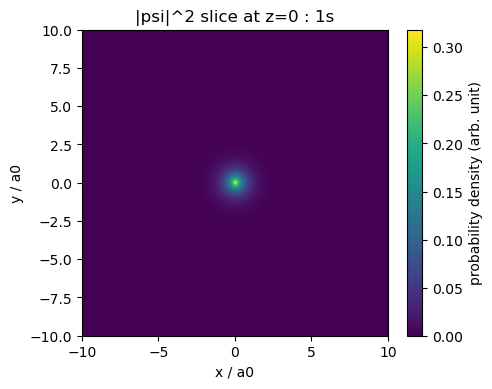

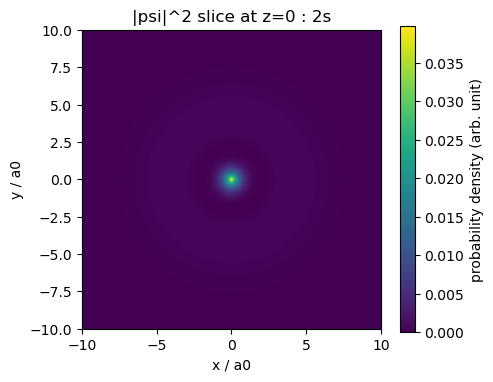

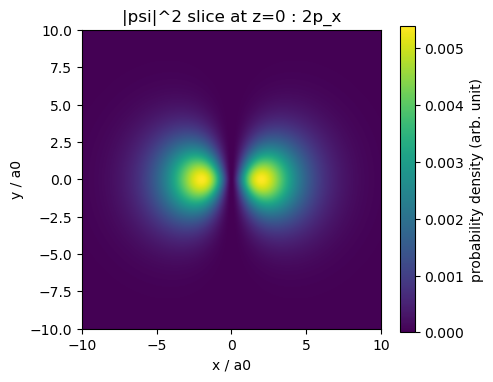

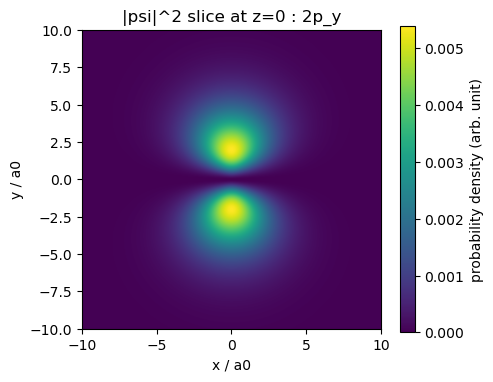

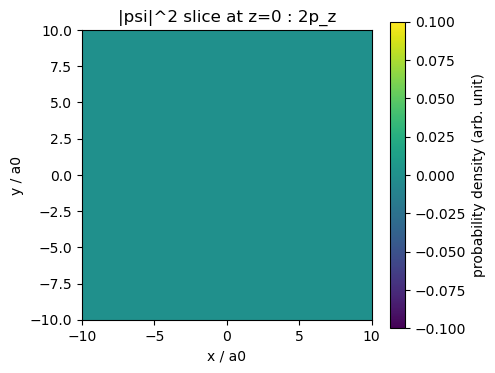

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Satuan: pakai a0 = 1 agar bersih; skala dimensi bisa dikembalikan dengan a0 sebenarnya.
a0 = 1.0

def psi_1s(r):
    return (1/np.sqrt(np.pi)) * np.exp(-r/a0)

def psi_2s(r):
    return (1/(4*np.sqrt(2*np.pi))) * (2 - r/a0) * np.exp(-r/(2*a0))

def psi_2p_common(r, ang):
    # faktor radial bersama untuk semua 2p
    return (1/(4*np.sqrt(2*np.pi))) * (r/a0) * np.exp(-r/(2*a0)) * ang

def density_1s(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    psi = psi_1s(r)
    return np.abs(psi)**2

def density_2s(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    psi = psi_2s(r)
    return np.abs(psi)**2

def density_2p_x(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2) + 1e-12
    sin_th = np.sqrt(x**2 + y**2) / r
    cos_phi = np.where(sin_th>0, x/np.sqrt(x**2 + y**2), 0.0)
    psi = psi_2p_common(r, sin_th * cos_phi)
    return np.abs(psi)**2

def density_2p_y(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2) + 1e-12
    sin_th = np.sqrt(x**2 + y**2) / r
    sin_phi = np.where(sin_th>0, y/np.sqrt(x**2 + y**2), 0.0)
    psi = psi_2p_common(r, sin_th * sin_phi)
    return np.abs(psi)**2

def density_2p_z(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2) + 1e-12
    cos_th = z / r
    psi = psi_2p_common(r, cos_th)
    return np.abs(psi)**2

# Grid potongan z=0
N = 501
L = 10.0  # dalam satuan a0
x = np.linspace(-L, L, N)
y = np.linspace(-L, L, N)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

maps = [
    ("1s", density_1s),
    ("2s", density_2s),
    ("2p_x", density_2p_x),
    ("2p_y", density_2p_y),
    ("2p_z", density_2p_z),
]

for name, dens_fn in maps:
    D = dens_fn(X, Y, Z)
    plt.figure(figsize=(5,4))
    plt.imshow(D, extent=[-L, L, -L, L], origin="lower")
    plt.xlabel("x / a0")
    plt.ylabel("y / a0")
    plt.title(f"|psi|^2 slice at z=0 : {name}")
    plt.colorbar(label="probability density (arb. unit)")
    plt.tight_layout()
plt.show()

# Soal 2

Misalkan ada suatu kristal satu dimensi berbentuk rantai dengan sel satuan yang tersusun atas atom A dan atom B.  Jarak antara atom A dan atom B memiliki dua nilai, yakni untuk atom A dan B dalam satu sel bernilai $a_1$, sementara untuk atom A di suatu sel ke atom B di sel tetangga terdekatnya adalah $a_2$. Dalam hal ini, konstanta kisi dapat didefinisikan oleh $a = a_1 + a_2$.

Energi *on-site* pada atom A diasumsikan sama dengan atom B (dengan kata lain, elemen matriks Hamiltonian $H_{AA} = H_{BB}$, misalkan saja diatur sebagai nilai referensi sebesar $0$), sementara kuat interaksi *hopping* antara atom A dengan atom B yang berada di dalam satu sel diasumsikan $t_1$ dan interaksi *hopping* antara atom A dengan atom B di tetangga sel yang berbeda adalah $t_2$. 

![kristalrantai1D](figs/kumatproset02-1.png)

Sistem ini diilustrasikan pada gambar di atas. Berdasarkan informasi tersebut:

(a) Turunkanlah formula untuk hubungan dispersi energi $E$ sebagai fungsi $k$, disertai parameter $t_1$, $t_2$, dan $a$.

(b) Untuk $t_1 = t_2 = t$, buatlah sketsa hubungan dispersi energi dengan sumbu vertikal berupa $E/t$ dan sumbu horizontalnya adalah $k a / \pi$. Upayakan ada kode programnya juga, misalnya dalam Python.

## Jawaban 2: 

Tulis jawabanmu di sini.

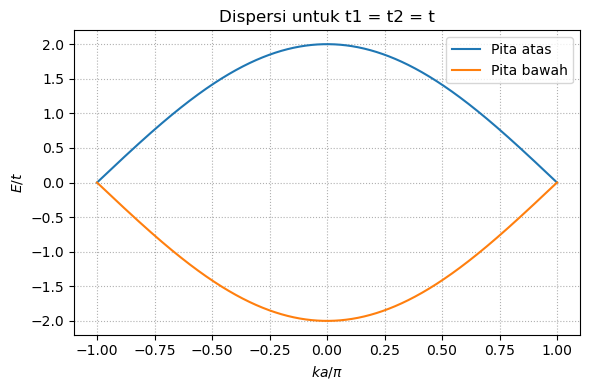

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
t1 = 1.0
t2 = 1.0
a  = 1.0

# Kisi k pada BZ [-pi/a, pi/a]
k = np.linspace(-np.pi/a, np.pi/a, 1201)

# Dispersi umum
Eplus  =  np.sqrt(t1**2 + t2**2 + 2*t1*t2*np.cos(k*a))
Eminus = -np.sqrt(t1**2 + t2**2 + 2*t1*t2*np.cos(k*a))

# Sumbu terukur: ka/pi pada horizontal, E/t pada vertikal
x = k*a/np.pi
y_plus  = Eplus/ max(t1, t2)  # di sini sama dengan t
y_minus = Eminus/ max(t1, t2)

plt.figure(figsize=(6,4))
plt.plot(x, y_plus,  label="Pita atas")
plt.plot(x, y_minus, label="Pita bawah")
plt.xlabel(r"$ka/\pi$")
plt.ylabel(r"$E/t$")
plt.title("Dispersi untuk t1 = t2 = t")
plt.legend()
plt.grid(True, linestyle=":", linewidth=0.8)
plt.tight_layout()
plt.show()

***

# Soal 3

Kristal trans-polyacetylene (CH)$_x$ dapat didefinisikan seperti pada gambar di bawah.
![kristalkotak2D](figs/kumatproset02-2.png)

Sistem ini dapat dipandang sebagai suatu rantai karbon satu dimensi dengan pola berulang A-B dalam satu selnya seperti diindikasikan pada gambar. Jika konstanta kisi didefinisikan $a$, maka jarak terdekat A dengan B adalah $a/2$. Kuat interaksi *hopping* antara A dan B yang terdekat diasumsikan sebesar $t$, kemudian *overlap*-nya adalah sebesar $s$.  Energi *on-site* untuk atom karbon meninjau orbital $p_z$ saja adalah $\epsilon_{2p}$.  

Berdasarkan informasi tersebut:

(a) (maks. 15 poin) Turunkanlah formula untuk hubungan dispersi energi $E$ sebagai fungsi $k$ disertai parameter $t$, $s$, dan $\epsilon_{2p}$, dan $a$.

(b) (maks. 10 poin) Untuk $\epsilon_{2p} = 0$, $t = -0.1~\textrm{eV}$ dan $s = 0.2$, buatlah sketsa hubungan dispersi energi dengan sumbu vertikal berupa $E$ dan sumbu horizontalnya adalah $k a / \pi$. Upayakan ada kode programnya juga, misalnya dalam Python.

## Jawaban 3: 

Tulis jawabanmu di sini.

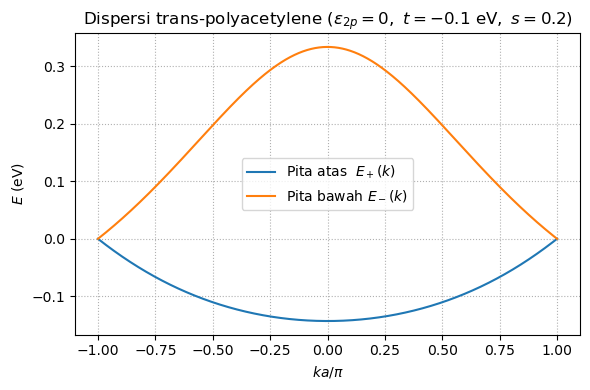

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
eps = 0.0       # e2p dalam eV
t   = -0.1      # eV
s   = 0.2
a   = 1.0       # boleh diset 1 tanpa kehilangan generalitas

# Kisi k pada BZ
k = np.linspace(-np.pi/a, np.pi/a, 2001)
C = np.cos(0.5*k*a)

E_plus  = (eps + 2*t*C) / (1 + 2*s*C)
E_minus = (eps - 2*t*C) / (1 - 2*s*C)

x = k*a/np.pi   # sumbu horizontal: ka/pi

plt.figure(figsize=(6,4))
plt.plot(x, E_plus,  label="Pita atas  $E_+(k)$")
plt.plot(x, E_minus, label="Pita bawah $E_-(k)$")
plt.xlabel(r"$ka/\pi$")
plt.ylabel(r"$E$ (eV)")
plt.title(r"Dispersi trans-polyacetylene ($\varepsilon_{2p}=0,\ t=-0.1\ \mathrm{eV},\ s=0.2$)")
plt.grid(True, linestyle=":", linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.show()

***

# Soal 4

Misalkan ada suatu kristal dua dimensi berbentuk kotak sederhana dengan sel satuan berbentuk persegi sempurna yang tersusun atas satu atom saja.  Konstanta kisinya adalah $a$ seperti ditunjukkan pada gambar di bawah.

![kristalkotak2D](figs/kumatproset02-3.png)

Untuk kasus ini kita asumsikan ada dua macam interaksi, yakni antara atom dalam suatu sel satuan dengan atom-atom tetangga terdekat dan atom-atom tetangga terdekat berikutnya (terdekat kedua). Interaksi dengan tetangga terdekat dimisalkan sebagai $t$, sementara interaksi dengan tetangga terdekat kedua dimisalkan sebagai $t^\prime$. 

Berdasarkan informasi tersebut:

(a) (maks. 15 poin) Turunkanlah formula untuk hubungan dispersi energi $E$ sebagai fungsi $k_x$ dan $k_y$.

(b) (maks. 10 poin) Untuk $t^\prime = t/4$, buatlah sketsa hubungan dispersi energinya berupa permukaan energi yang diplot terhadap $k_x a / \pi$ dan $k_y a / \pi$. Upayakan ada kode programnya juga, misalnya dalam Python.

## Jawaban 4: 

Tulis jawabanmu di sini.

# Soal 5

Pada repositori kuliah, rekan-rekan dapat mengunduh program komputasi struktur elektronik hidrogen yang menghitung nilai energi keadaan dasarnya menggunakan superposisi fungsi Gaussian. Silakan eksplorasi program tersebut dengan, misalnya, (1) mengubah koefisien fungsi basis Gaussian yang digunakan, (2) mengubah jumlah fungsi Gaussian, (3) kreativitas lainnya, dan laporkan apa efeknya terhadap akurasi perhitungan keadaan dasar atom hidrogen. Perhatikan bahwa superposisi fungsi gelombang basis tsb sangat mirip metodenya dengan LCAO pada molekul maupun TB pada kristal, hanya saja dikerjakan untuk individu 1 buah atom hidrogen.

## Jawaban 5: 

Tulis jawabanmu di sini.